In [43]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
#from api_keys import api_key
api_key = "2b9ddbcf4b38608278164c70189b56bd"
# Incorporated citipy to determine city based on latitude and longitude
 from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [46]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    
   
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} : {city_record}")
        
        record= record + 1
        
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 : Goderich
Processing Record 2 : Tamandare
Processing Record 3 : Gunnedah
City not found. Skipping...
Processing Record 4 : Vostok
Processing Record 5 : Semey
Processing Record 6 : Kavaratti
Processing Record 7 : Vaini
Processing Record 8 : Sao Filipe
Processing Record 9 : Ushuaia
Processing Record 10 : Hithadhoo
City not found. Skipping...
Processing Record 11 : Jamestown
Processing Record 12 : Kapaa
Processing Record 13 : The Valley
Processing Record 14 : Campbellton
Processing Record 15 : Mahibadhoo
Processing Record 16 : Abu Dhabi
Processing Record 17 : Tuktoyaktuk
City not found. Skipping...
Processing Record 18 : Juneau
Processing Record 19 : Rio Gallegos
Processing Record 20 : Mahebourg
Processing Record 21 : Lagoa
Processing Record 22 : Ayan
Processing Record 23 : Kavieng
Processing Record 24 : Qaanaaq
City not found. Skipping...
Processing Record 25 : Nouadhibou
Processing Record 26 : Cidreira
Process

Processing Record 228 : Marsh Harbour
Processing Record 229 : Jiazi
Processing Record 230 : Tortoli
Processing Record 231 : San Francisco
Processing Record 232 : Tongren
Processing Record 233 : Dovers
Processing Record 234 : Ibra
Processing Record 235 : Tecpan
Processing Record 236 : Irece
Processing Record 237 : Fairbanks
Processing Record 238 : Barrow
Processing Record 239 : Vieste
Processing Record 240 : Tornio
Processing Record 241 : Nome
Processing Record 242 : Henties Bay
Processing Record 243 : Quang Ngai
Processing Record 244 : Antalaha
Processing Record 245 : Huarmey
Processing Record 246 : Haines Junction
Processing Record 247 : Ilulissat
Processing Record 248 : Bambous Virieux
Processing Record 249 : San Policarpo
Processing Record 250 : Yanaul
City not found. Skipping...
Processing Record 251 : Jesup
Processing Record 252 : Myitkyina
Processing Record 253 : Todos Santos
City not found. Skipping...
Processing Record 254 : Kafanchan
Processing Record 255 : Bredasdorp
Processi

Processing Record 459 : Santa Fe
Processing Record 460 : Souris
City not found. Skipping...
Processing Record 461 : Neiafu
Processing Record 462 : Presidencia Roque Saenz Pena
Processing Record 463 : Catabola
Processing Record 464 : Lahaina
Processing Record 465 : Khorixas
Processing Record 466 : Denpasar
Processing Record 467 : Angoram
Processing Record 468 : Saint Anthony
Processing Record 469 : Novaya Ladoga
Processing Record 470 : Severomuysk
Processing Record 471 : Te Anau
Processing Record 472 : Kilindoni
City not found. Skipping...
Processing Record 473 : Ola
Processing Record 474 : Karakol
Processing Record 475 : Bonfim
Processing Record 476 : Praia da Vitoria
Processing Record 477 : Medicine Hat
City not found. Skipping...
Processing Record 478 : Buncrana
Processing Record 479 : Cabinda
Processing Record 480 : Plerin
Processing Record 481 : Casablanca
Processing Record 482 : Jabinyanah
Processing Record 483 : Sibu
Processing Record 484 : Fairview
City not found. Skipping...
Pr

In [47]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [48]:

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Goderich,29,CA,1561596474,74,43.74,-81.71,73.99,1.01
1,Tamandare,54,BR,1561596487,69,-8.28,-70.75,76.40,1.23
2,Gunnedah,0,AU,1561596487,63,-30.98,150.25,61.00,6.93
3,Vostok,100,RU,1561596430,99,46.45,135.83,58.40,3.11
4,Semey,0,KZ,1561596488,49,50.41,80.25,67.40,11.70


In [53]:
weather_data.to_csv('weather_csv/data.csv')


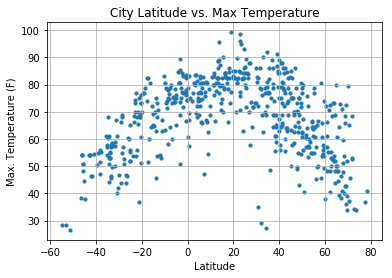

In [49]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")
plt.show()

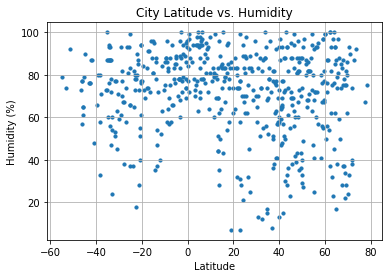

In [50]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Humidity_vs_Latitude.png")
plt.show()

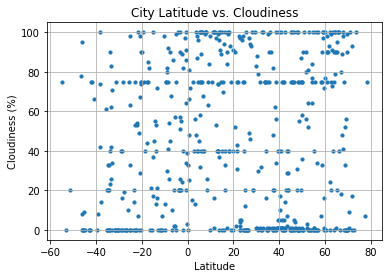

In [51]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")
plt.show()

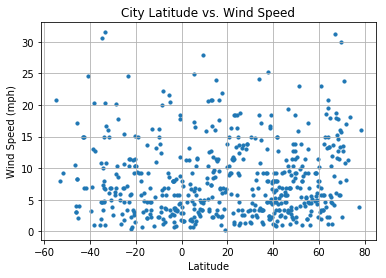

In [52]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")
plt.show()